# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
- n_components=2, learning_rate=250, random_state=42.
- Постройте диаграмму рассеяния на этих данных.


In [59]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

In [60]:
boston = load_boston()

In [112]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['Price'])

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [115]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [116]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [117]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [118]:
print('После преобразования:\t{}',X_train_tsne.shape)
print('До преобразования:\t{}',X_train_scaled.shape)

После преобразования:	{} (404, 2)
До преобразования:	{} (404, 13)


In [119]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,9]

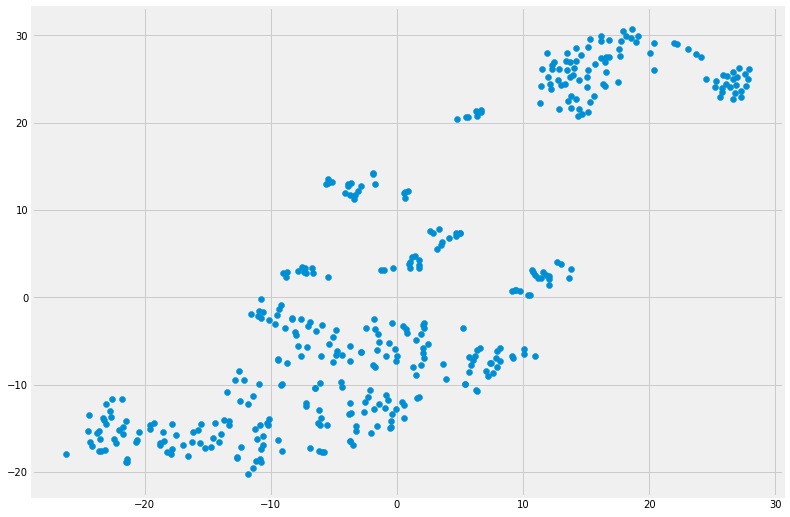

In [120]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

# Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [121]:
from sklearn.cluster import KMeans

In [122]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [123]:
labels_train = kmeans.fit_predict(X_train_scaled)

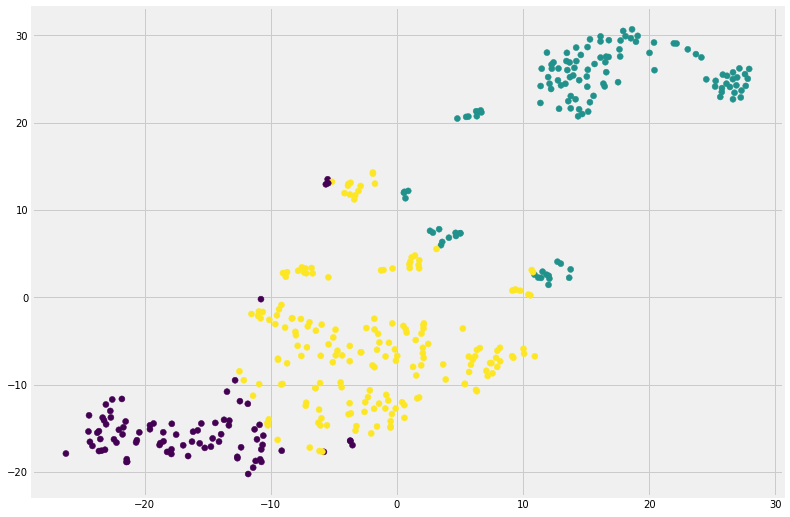

In [124]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)

In [125]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [126]:
X_train.merge(y_train, left_index=True, right_index=True).groupby(labels_train).agg({'CRIM': 'mean', 'Price': 'mean'})

,CRIM,Price
0,0.073566,27.788372
1,10.797028,16.165354
2,0.421660,24.958115


# * Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [128]:
labels_test = kmeans.predict(X_test_scaled)

In [130]:
X_test.merge(y_test, left_index=True, right_index=True).groupby(labels_test).agg({'CRIM': 'mean', 'Price': 'mean'})

,CRIM,Price
0,0.062060,31.350000
1,10.165531,16.437143
2,0.266079,21.860784
